Basic workflow in a predictive modeling problem

1.Exploratory(探索的) Data Analysis 
- try to visualize, summarize and interprete it looking for information.

2.Feature(特徴/変数) Engineering and Data Cleaning(データ前処理) 
- In this step we might add few features, Remove redundant(冗長) features, Converting features into suitable(適した) form for modeling.

3.Predictive(予測) Modeling
-  try basic ML algorthms, cross validate(交差検定), ensemble(アンサンブル) and Important feature Extraction(特徴抽出).


#PART 1 : Exploratory Data Analysis (EDA)

With the objective in mind(目的を念頭において) that this kernal aims to explain the workflow of a predictive modelling problem for begginers, I will try to use simple easy to understand visualizations in the EDA section.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

def display_weights(model):
    # ニューラルネットの各層について、重みの絶対値の総和をプロット
    for i in range(len(model.layers)):
        w1 = model.layers[i].get_weights()[0]
        plt.figure()
        plt.plot(range(1, len(w1)+1), (w1**2).sum(axis=1), 'o-')
        plt.show()



['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
# Read data to a pandas data frame
data=pd.read_csv('../input/train.csv')
# lets have a look on first few rows
display(data.head())

# Checking shape of our data set (892 x 12 )
print('Shape of Data : ',data.shape)


#checking for null value counts in each column 欠損値データ数の確認
data.isnull().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape of Data :  (891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

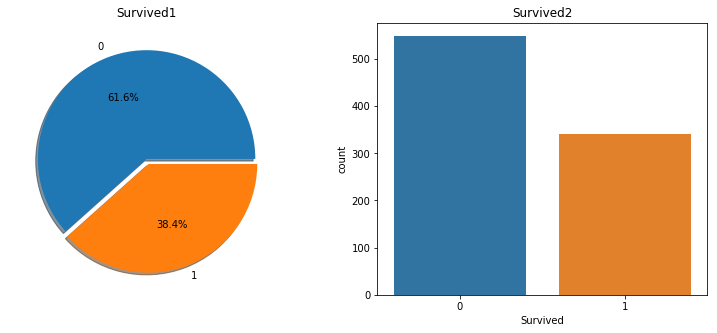

In [3]:
#Lets look at overall(全体的) survival stats

f,ax=plt.subplots(1,2,figsize=(13,5))

#円グラフ
data['Survived'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Survived1')
ax[0].set_ylabel('')

#棒グラフ
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived2')
plt.show()


Let's analyse features

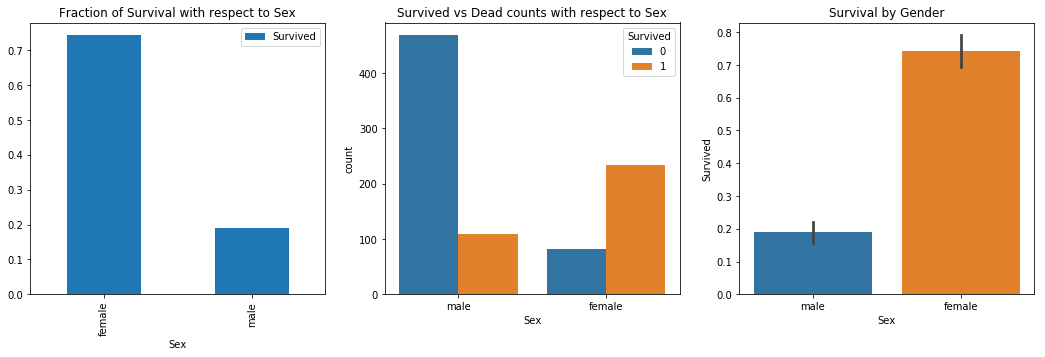

In [4]:


##Feature: Sex

f,ax=plt.subplots(1,3,figsize=(18,5))

#女性の生存率は7割越え
#https://note.nkmk.me/python-pandas-groupby-statistics/
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fraction of Survival with respect to Sex')


sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Sex')

sns.barplot(x="Sex", y="Survived", data=data,ax=ax[2])
ax[2].set_title('Survival by Gender')

plt.show()

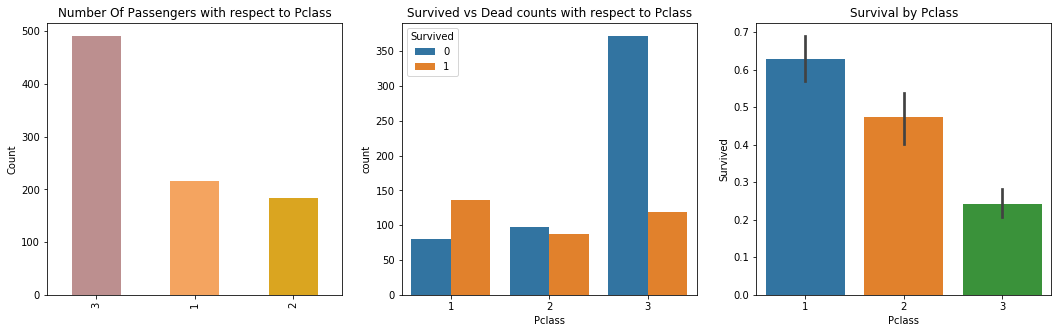

In [5]:
##Feature: Pclass
f,ax=plt.subplots(1,3,figsize=(18,5))

#各身分の総数　(一番身分が低い「3」の乗客が多い)
data['Pclass'].value_counts().plot.bar(color=['#BC8F8F','#F4A460','#DAA520'],ax=ax[0])
ax[0].set_title('Number Of Passengers with respect to Pclass')
ax[0].set_ylabel('Count')

#各身分のうち、生/死の内訳
## For Pclass 1 %survived is around 63%, for Pclass2 is around 48% and for Pclass2 is around 25%.
### →身分が上の階級ほど、生存率が高い
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Pclass')


sns.barplot(x="Pclass", y="Survived", data=data,ax=ax[2])
ax[2].set_title('Survival by Pclass')
plt.show()


Feature: Age

In [6]:
# Survival rate for passenegers below Age 14(i.e children) looks to be good than others.
plt.figure(figsize=(25,6))
#sns.barplot(data['Age'],data['Survived'], ci=None)
#plt.xticks(rotation=90);

<Figure size 1800x432 with 0 Axes>

<Figure size 1800x432 with 0 Axes>

Rememer we had 177 null values in the Age feature. How are we gonna fill them?.


Filling Age NaN(欠損値を埋める)

Well there are many ways to do this. 

One can use the mean(平均) value or median(中央値) .. etc.. But can we do better?. 

Seems yes. 
EDA To Prediction(DieTanic) has used a wonderful method which I would use here too. 
https://www.kaggle.com/ash316/eda-to-prediction-dietanic#EDA-To-Prediction-(DieTanic

Feature: Embarked

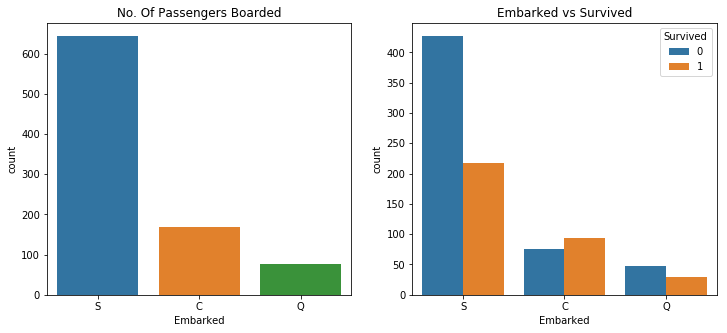

In [7]:
f,ax=plt.subplots(1,2,figsize=(12,5))

#Majority of passengers boarded(搭乗) from Southampton Survival counts looks better at C. 

sns.countplot('Embarked',data=data,ax=ax[0])
ax[0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Survived')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()


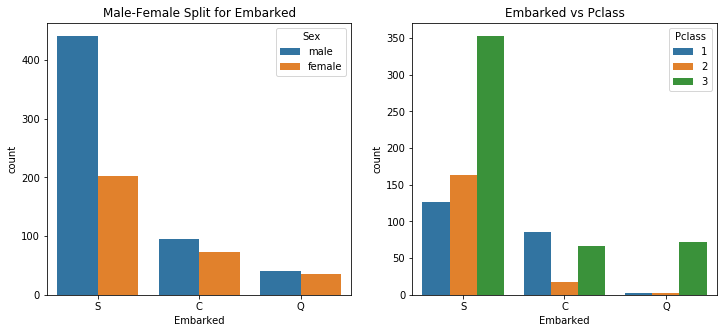

In [8]:
#Could there be an influence(影響) from sex and class features we already studied?
f,ax=plt.subplots(1,2,figsize=(12,5))

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0])
ax[0].set_title('Male-Female Split for Embarked')


#★We guessed correctly. higher % of 1st class passegers boarding from C might be the reason.
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Pclass')


plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

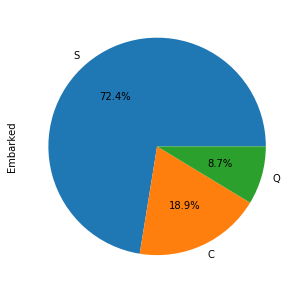

False

In [9]:
f,ax=plt.subplots(1,1,figsize=(6,5))
data['Embarked'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.1f%%',ax=ax)
plt.show()

#Filling Embarked NaN
##lets fill missing 2 values using S (Southampton)
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

Features: SibSip & Parch
SibSip + Parch -> Family Size

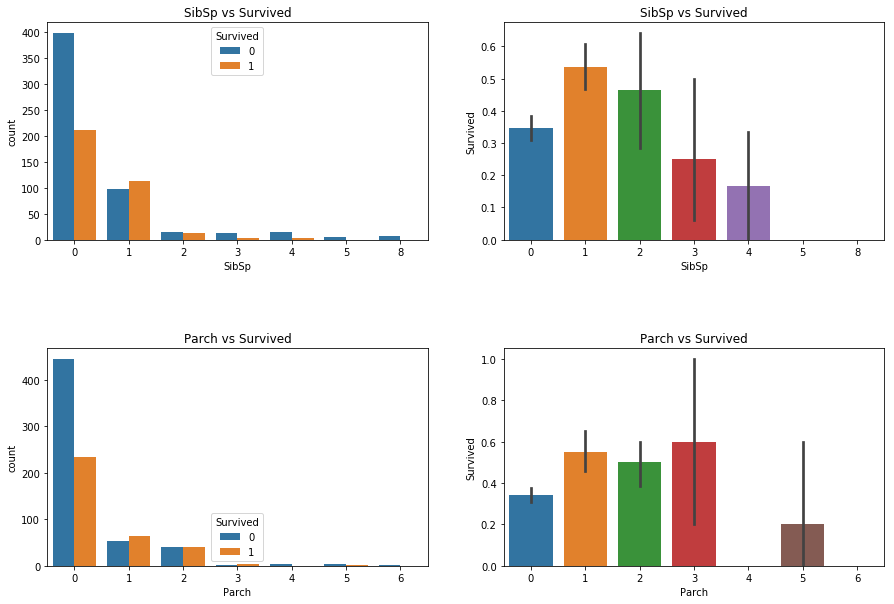

In [10]:
f,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot('SibSp',hue='Survived',data=data,ax=ax[0,0])
ax[0,0].set_title('SibSp vs Survived')
sns.barplot('SibSp','Survived',data=data,ax=ax[0,1])
ax[0,1].set_title('SibSp vs Survived')

sns.countplot('Parch',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Parch vs Survived')
sns.barplot('Parch','Survived',data=data,ax=ax[1,1])
ax[1,1].set_title('Parch vs Survived')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

The barplot and factorplot(要因プロット) shows that if a passenger is alone onboard with no siblings(兄弟なし), he have 34.5% survival rate. The graph roughly(おおよそ) decreases if the number of siblings increase.

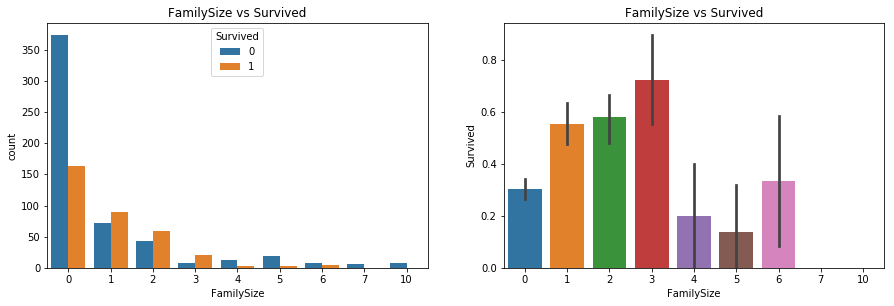

In [11]:
#Lets combine above and analyse family size.
data['FamilySize'] = data['Parch'] + data['SibSp']
f,ax=plt.subplots(1,2,figsize=(15,4.5))
sns.countplot('FamilySize',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('FamilySize vs Survived')
sns.barplot('FamilySize','Survived',data=data,ax=ax[1])
ax[1].set_title('FamilySize vs Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

#This looks interesting! looks like family sizes of 1-3 have better survival rates than others.

Features: Fare(運賃)
Meaning : Passenger fare

Highest Fare: 512.3292    Lowest Fare: 0.0     Average Fare: 32.2042079685746


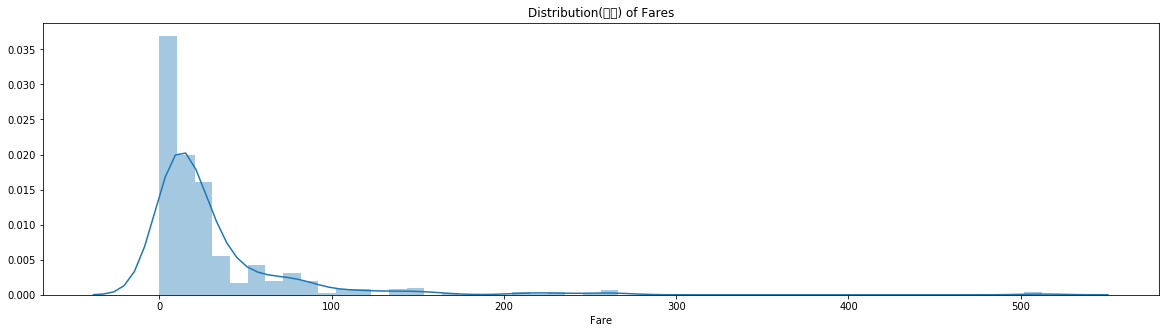

In [12]:
f,ax=plt.subplots(1,1,figsize=(20,5))
sns.distplot(data.Fare,ax=ax)
ax.set_title('Distribution(分布) of Fares')
plt.show

print('Highest Fare:',data['Fare'].max(),'   Lowest Fare:',data['Fare'].min(),'    Average Fare:',data['Fare'].mean())

In [13]:
#階級数を「6」
data['Fare_Bin']=pd.qcut(data['Fare'],6)
data.groupby(['Fare_Bin'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

#It is clear(明らか) that as Fare Bins increase chances of survival increase too.

,Survived
Fare_Bin,
"(-0.001, 7.775]",0.205128
"(7.775, 8.662]",0.190789
"(8.662, 14.454]",0.366906
"(14.454, 26.0]",0.436242
"(26.0, 52.369]",0.417808
"(52.369, 512.329]",0.697987


Observations(観察) Summary

Sex: Survival chance for female is better than that for male.

Pclass: Being a 1st class passenger gives you better chances of survival.

Age: Age range 5-10 years have a high chance of survival.

Embarked: Majority of passengers borded from Southampton.
The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. All most all Passengers at Q were from Pclass3.

Family Size: looks like family sizes of 1-3 have better survival rates than others.

Fare: As Fare Bins increase chances of survival increases

Correlation(相関) Between The Features

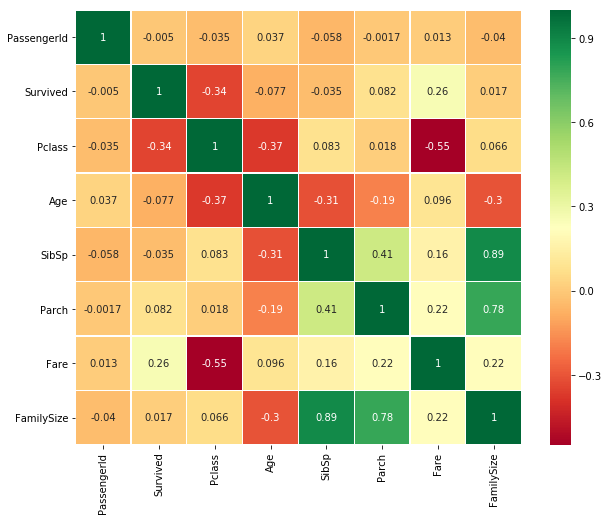

In [14]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#PART 2 : Feature Engineering and Data Cleaning

Now what is Feature Engineering? 

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.

In this section we will be doing,

(モデリングに組み込むための、データ変換プロセス。文字列変換やカテゴライズ化等)
1.Converting String Values into Numeric

2.Convert Age into a categorical feature by binning

3.Convert Fare into a categorical feature by binning

4.Dropping Unwanted Features

In [15]:
#Converting String Values into Numeric

data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
#print(data["Sex"])
#print(data["Embarked"])

data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

print(data["Initial"])

0      0
1      1
2      2
3      1
4      0
5      0
6      0
7      3
8      1
9      1
10     2
11     2
12     0
13     0
14     2
15     1
16     3
17     0
18     1
19     1
20     0
21     0
22     2
23     0
24     2
25     1
26     0
27     0
28     2
29     0
      ..
861    0
862    1
863    2
864    0
865    1
866    2
867    0
868    0
869    3
870    0
871    1
872    0
873    0
874    1
875    2
876    0
877    0
878    0
879    1
880    1
881    0
882    2
883    0
884    0
885    1
886    4
887    2
888    2
889    0
890    0
Name: Initial, Length: 891, dtype: int64


In [16]:
#Convert Age into a categorical feature by binning

data['Age_cat']=0
#locは行ラベルの追加
data.loc[data['Age']<=16,'Age_cat']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_cat']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_cat']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_cat']=3
data.loc[data['Age']>64,'Age_cat']=4

print(data)

     PassengerId  Survived  Pclass   ...              Fare_Bin  Initial  Age_cat
0              1         0       3   ...       (-0.001, 7.775]        0        1
1              2         1       1   ...     (52.369, 512.329]        1        2
2              3         1       3   ...        (7.775, 8.662]        2        1
3              4         1       1   ...     (52.369, 512.329]        1        2
4              5         0       3   ...        (7.775, 8.662]        0        2
5              6         0       3   ...        (7.775, 8.662]        0        2
6              7         0       1   ...        (26.0, 52.369]        0        3
7              8         0       3   ...        (14.454, 26.0]        3        0
8              9         1       3   ...       (8.662, 14.454]        1        1
9             10         1       2   ...        (26.0, 52.369]        1        0
10            11         1       3   ...        (14.454, 26.0]        2        0
11            12         1  

In [17]:
#Convert Fare into a categorical feature by binning
data['Fare_cat']=0
data.loc[data['Fare']<=7.775,'Fare_cat']=0
data.loc[(data['Fare']>7.775)&(data['Fare']<=8.662),'Fare_cat']=1
data.loc[(data['Fare']>8.662)&(data['Fare']<=14.454),'Fare_cat']=2
data.loc[(data['Fare']>14.454)&(data['Fare']<=26.0),'Fare_cat']=3
data.loc[(data['Fare']>26.0)&(data['Fare']<=52.369),'Fare_cat']=4
data.loc[data['Fare']>52.369,'Fare_cat']=5
print(data)

     PassengerId  Survived  Pclass    ...    Initial  Age_cat  Fare_cat
0              1         0       3    ...          0        1         0
1              2         1       1    ...          1        2         5
2              3         1       3    ...          2        1         1
3              4         1       1    ...          1        2         5
4              5         0       3    ...          0        2         1
5              6         0       3    ...          0        2         1
6              7         0       1    ...          0        3         4
7              8         0       3    ...          3        0         3
8              9         1       3    ...          1        1         2
9             10         1       2    ...          1        0         4
10            11         1       3    ...          2        0         3
11            12         1       1    ...          2        3         4
12            13         0       3    ...          0        1   

In [18]:
#Dropping Unwanted Features (不要な変数の削除)

data.drop(['Name','Age','Fare','Ticket','Cabin','Fare_Bin','SibSp','Parch','PassengerId'],axis=1,inplace=True)
data.head(2)

,Survived,Pclass,Sex,Embarked,FamilySize,Initial,Age_cat,Fare_cat
0,0,3,0,0,1,0,1,0
1,1,1,1,1,1,1,2,5


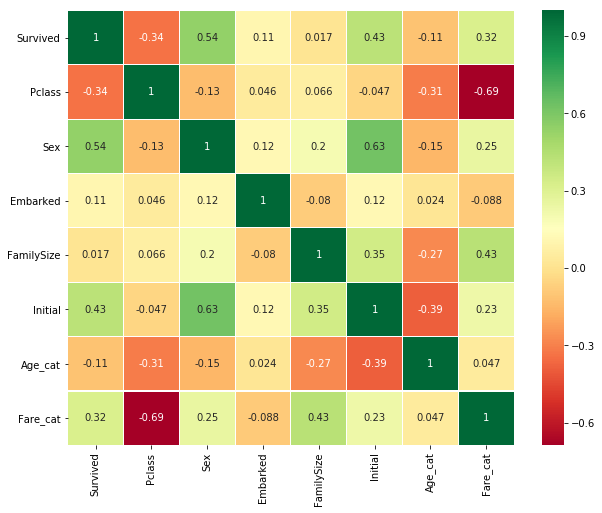

In [19]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#PART 3 : Predictive Modeling

Now after data cleaning and feature engineering we are ready to train some classification(分類) algorithms that will make predictions for unseen(見えない) data. 

We will first train few classification algorithms and see how they perform. 

Then we can look how an ensemble(アンサンブル) of classification algorithms perform on this data set. 

Following Machine Learning algorithms will be used in this kernal.

1.Logistic Regression(回帰) Classifier(分類器)

2.Naive Bayes Classifier

3.Decision Tree Classifier(決定木分類器)

4.Random Forest Classifier(ランダムフォレスト分類器)



In [20]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [21]:
#Lets prepare data sets for training. 
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])

#print(train)
#print('Shape of Data : ',train.shape)
#先頭の1列目(生存：0/1)以外をインプットデータに
train_X=train[train.columns[1:]]
#print('Shape of Data : ',train_X.shape)

#先頭の1列目(生存：0/1)
train_Y=train[train.columns[:1]]
#print(train_Y)

test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']

#print(X)
#print(Y)



In [22]:
#train_X.isnull().sum()
train_X = train_X.dropna()
train_X.isnull().sum()

print(train_Y)

     Survived
231         0
836         0
639         0
389         1
597         0
20          0
179         0
183         1
38          0
692         1
176         0
158         0
643         1
857         1
541         0
307         1
726         1
161         1
839         1
185         0
87          0
354         0
670         1
578         0
554         1
313         0
49          0
488         0
111         0
157         0
..        ...
605         0
724         1
709         1
446         1
614         0
861         0
118         0
443         1
848         0
278         0
765         1
682         0
662         0
166         1
177         0
745         0
202         0
201         0
573         1
803         1
41          0
642         0
492         0
874         1
407         1
131         0
490         0
838         1
48          0
80          0

[623 rows x 1 columns]


In [23]:
print('Shape of Data : ',train_X.shape)
print('Shape of Data : ',train_Y.shape)

print(type(train_X))
print(type(train_X.values))


Shape of Data :  (623, 7)
Shape of Data :  (623, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# インスタンス作成
model = Sequential([

])

#損失関数：この値が大きければ良くない、小さければ良いということになる
## 今の状態からなるべく損失が小さくなるように各パラメータを少しだけ動かす、というのを繰り返す
## 候補
### 二乗誤差
###  cross entropy ←一番代表的
#### ↑「ニューラルネットワークの尤度が最大化するようにパラメータを決める」という考えから出発すると導出できる

model.compile(optimizer='adam', #各層のノード係数を最適化する手法の指定
              loss='binary_crossentropy',#損失関数の指定
              metrics=['accuracy']) #結果を評価する手法の指定 (accuracy=正解値とと出力値を比較して正解率を決定する手法))


# 入力ユニット数：7
# 中間層①:全結合層ユニット数：7
model.add(Dense(7, input_dim=7))


# 中間層②:全結合層ユニット数：7
model.add(Dense(7))

# 活性化関数を通してモデルに非線形性を与えることができる 
## 中間層の活性化関数に求められるもの(学習が早い、勾配が消えない、 微分可能、)
## 一般的な候補(シグモイド,ハイパボリックタンジェント(tanh), relu )
###　シグモイド(0～1)...勾配が消えてしまうため、隠れユニットとしては 好ましくない
###  tanh(-1～1)...勾配が消えてしまうため、隠れユニットとしては 好ましくない
###  上記は、グラフからもわかるように、|x|が大きいと勾配が消えるし、原点付近は線形に近いため、学習が遅い
### relu ... 勾配が消えない( x = 0 のとき微分できないゆえに、劣微分(subdiﬀerential)を考える)
model.add(Activation("relu"))

model.add(Dense(7))
model.add(Activation("relu"))

# 出力ユニット数：1
model.add(Dense(1))
# 出力層の活性化関数：「人間がどのような出力が欲しいか？」で決まる
## 今回は生存確率(0～1)が欲しいので、シグモイド（確率値に変換）
## ソフトマックスは、「カテゴリカル分布」とも呼ばれ、例えば、インプットが「犬」である確率が～、
## 「猫」である確率が～という知見が得られる
model.add(Activation("sigmoid"))

#1次元配列データにして、挿入
#全データ632(バッチ)に対して、batch_size = 32(ミニバッチ)で学習を進める
model.fit(train_X.values, train_Y.values, epochs=100, batch_size=32)

model.summary()

Using TensorFlow backend.


Epoch 1/100
623/623 [==============================] - 0s 524us/step - loss: 0.6738 - acc: 0.6116
Epoch 2/100
623/623 [==============================] - 0s 38us/step - loss: 0.6571 - acc: 0.6164
Epoch 3/100
623/623 [==============================] - 0s 40us/step - loss: 0.6417 - acc: 0.6164
Epoch 4/100
623/623 [==============================] - 0s 39us/step - loss: 0.6266 - acc: 0.6164
Epoch 5/100
623/623 [==============================] - 0s 38us/step - loss: 0.6132 - acc: 0.6164
Epoch 6/100
623/623 [==============================] - 0s 38us/step - loss: 0.5981 - acc: 0.6164
Epoch 7/100
623/623 [==============================] - 0s 39us/step - loss: 0.5862 - acc: 0.6164
Epoch 8/100
623/623 [==============================] - 0s 39us/step - loss: 0.5746 - acc: 0.6164
Epoch 9/100
623/623 [==============================] - 0s 38us/step - loss: 0.5649 - acc: 0.6035
Epoch 10/100
623/623 [==============================] - 0s 39us/step - loss: 0.5562 - acc: 0.6822
Epoch 11/100
623/623 [======

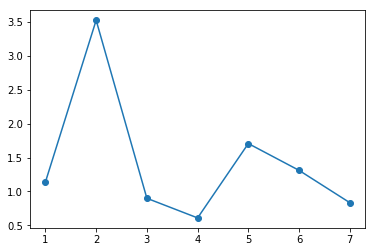

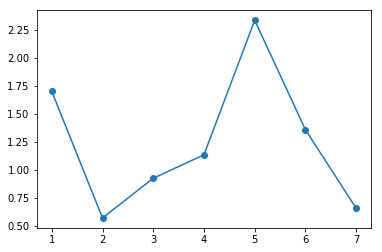

IndexError: list index out of range

In [25]:
# ニューラルネットの各層について、重みの絶対値の総和をプロット
for i in range(len(model.layers)):
    
    w1 = model.layers[i].get_weights()[0]
    plt.figure()
    plt.plot(range(1, len(w1)+1), (w1**2).sum(axis=1), 'o-')
    plt.show()

#過学習対策ver

#過学習... 訓練データには適合できているが、未知のデータには適合できていない状 態 
#過学習しやすい条件
##モデルの自由度が高い
##特徴量が多い(高次元) 
##データが少ない、ごみデータが多い
#過学習を避ける方針
##モデルの自由度を低くして、原理的に過学習しづらくする
##モデルの自由度を高くするが、過学習しないような対策をする→★ディープラーニングはこっちの方針


In [26]:
#正則化
##一言：制約事項を増やして、条件を厳しくする
###コスト関数を ED としたとき、別途正則化項 Ew を用意して、 両者を足した E= ED(w) + λEW(W) を最小化するようにする

## L1, L2正則化 (共通：過学習すると係数がやたら大きくなる傾向があるので各係数(重み)がなるべく小さくなるようにする、という方針 )


# L2正規化：生存時間パラメータのL2ノルムを損失に加える(Cは定数)
##• L(W) + cR(w)
##• R(w) = |w|2

from keras import regularizers
model = Sequential([

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.add(Dense(7, kernel_regularizer=regularizers.l2(0.001),
                   activation='relu', input_shape=(7,))) 
model.add(Dense(7, kernel_regularizer=regularizers.l2(0.001),
                   activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.fit(train_X.values, train_Y.values, epochs=100, batch_size=32)

model.summary()



Epoch 1/100
623/623 [==============================] - 0s 528us/step - loss: 0.6380 - acc: 0.7592
Epoch 2/100
623/623 [==============================] - 0s 38us/step - loss: 0.6093 - acc: 0.7673
Epoch 3/100
623/623 [==============================] - 0s 38us/step - loss: 0.5834 - acc: 0.7689
Epoch 4/100
623/623 [==============================] - 0s 39us/step - loss: 0.5591 - acc: 0.7689
Epoch 5/100
623/623 [==============================] - 0s 39us/step - loss: 0.5371 - acc: 0.7785
Epoch 6/100
623/623 [==============================] - 0s 38us/step - loss: 0.5178 - acc: 0.7817
Epoch 7/100
623/623 [==============================] - 0s 39us/step - loss: 0.5024 - acc: 0.7833
Epoch 8/100
623/623 [==============================] - 0s 37us/step - loss: 0.4913 - acc: 0.7897
Epoch 9/100
623/623 [==============================] - 0s 38us/step - loss: 0.4817 - acc: 0.7881
Epoch 10/100
623/623 [==============================] - 0s 39us/step - loss: 0.4744 - acc: 0.7913
Epoch 11/100
623/623 [======

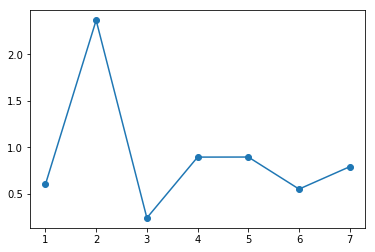

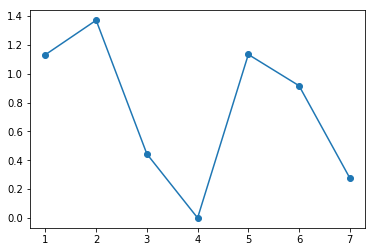

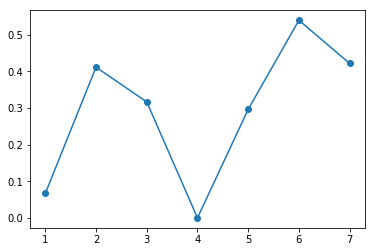

In [27]:
# ニューラルネットの各層について、重みの絶対値の総和をプロット
for i in range(len(model.layers)):
    
    w1 = model.layers[i].get_weights()[0]
    plt.figure()
    plt.plot(range(1, len(w1)+1), (w1**2).sum(axis=1), 'o-')
    plt.show()

In [28]:
#L1正則化:重みが0となる無駄なパラメータを見つけることができる。
## ★メリット... メモリ使用量の削減、計算量の削減、特徴選択を自動的に行っているとみなせる
#パラメータのL1ノルムを損失に加える(Cは定数)
##• L(W) + cR(w)
##• R(w) = |w|

from keras import regularizers
model = Sequential([

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.add(Dense(7, kernel_regularizer=regularizers.l1(0.001),
                   activation='relu', input_shape=(7,))) 
model.add(Dense(7, kernel_regularizer=regularizers.l1(0.001),
                   activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.fit(train_X.values, train_Y.values, epochs=100, batch_size=32)

model.summary()



Epoch 1/100
623/623 [==============================] - 0s 587us/step - loss: 1.0024 - acc: 0.3836
Epoch 2/100
623/623 [==============================] - 0s 38us/step - loss: 0.8772 - acc: 0.3884
Epoch 3/100
623/623 [==============================] - 0s 38us/step - loss: 0.7944 - acc: 0.4173
Epoch 4/100
623/623 [==============================] - 0s 38us/step - loss: 0.7390 - acc: 0.5201
Epoch 5/100
623/623 [==============================] - 0s 39us/step - loss: 0.6969 - acc: 0.6116
Epoch 6/100
623/623 [==============================] - 0s 39us/step - loss: 0.6678 - acc: 0.6469
Epoch 7/100
623/623 [==============================] - 0s 38us/step - loss: 0.6495 - acc: 0.6421
Epoch 8/100
623/623 [==============================] - 0s 37us/step - loss: 0.6339 - acc: 0.6597
Epoch 9/100
623/623 [==============================] - 0s 38us/step - loss: 0.6211 - acc: 0.6774
Epoch 10/100
623/623 [==============================] - 0s 39us/step - loss: 0.6093 - acc: 0.6870
Epoch 11/100
623/623 [======

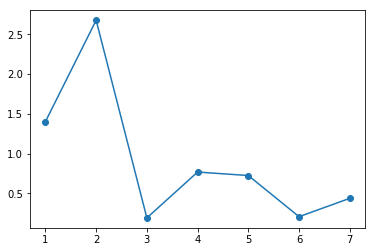

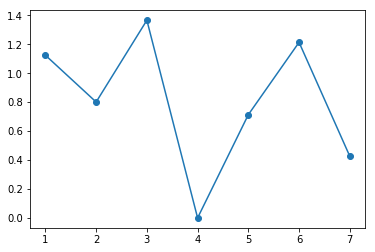

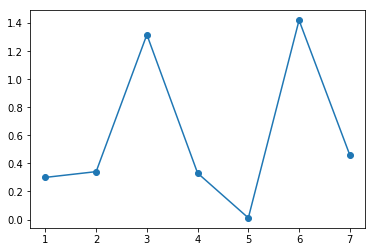

In [29]:
# ニューラルネットの各層について、重みの絶対値の総和をプロット
for i in range(len(model.layers)):
    
    w1 = model.layers[i].get_weights()[0]
    plt.figure()
    plt.plot(range(1, len(w1)+1), (w1**2).sum(axis=1), 'o-')
    plt.show()

多層NNは表現能力が高すぎるために色々な正則化を施しても やはり過学習してしまう
「学習をあえて邪魔することで より頑健なモデルが得る」という方針から、手法「dropout」

# dropout
- ネットワークのうち何割かのノードを一時的に削除(無効化) してしまう
- 学習するたびに無効にするノードは変更する
- 一般的には無効にするノードの割合(Dropout率)は50%

# なんでうまくいくの?
- Dropoutでは学習のたびにすこしずつ異なるネットワーク を使っていることになる
- 認識時にはすべての出力を統合することで、そのアンサン ブル効果が得られる(1つのネットワークでBaggingと同じこ とができる)

- 補足：Bagging(アンサンブル学習の一種)...いくつかのモデルを作り、組み合わせるだけ。それぞれの モデルが投票して得票数が最も多かった解を採用。
    - Baggingは独立して認識して最後に多数決を取る。Boostingでは1つずつモデルを作っていく方法をとる
    - より時間がかかるが、それまでに作ったモデルを評価しな がら新しいモデルを追加していくために汎化性能は上がる

In [30]:
#dropout

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout



# インスタンス作成
model = Sequential([

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.add(Dense(6, input_dim=6))

model.add(Dense(6))
model.add(Activation("relu"))
# dropout（rate：削除率）
model.add(Dropout(rate=0.2))


model.add(Dense(6))
model.add(Activation("relu"))

# 出力ユニット数：1
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.fit(train_X.values, train_Y.values, epochs=100, batch_size=32)

model.summary()

ValueError: Error when checking input: expected dense_11_input to have shape (6,) but got array with shape (7,)

# マルチタスク学習 
- 入力は同じだが、幾つかの問題を同時に解きたいことがある
- たとえば自動運転車で、「どこに何があるか」という問題と 「どのくらいの距離にあるか」という問題と「将来どのよう に移動するのかの予測」という問題を同時に解きたいような場合
  - 実際は問題は「ぶつからずに移動する解」を求めるために、上記3つの小問題を同時に解く必要があるといった位置関係

- このような問題をタスクごとに分けて考えるのではなく、ひ とつのネットワークで同時に解くことを考える

## マルチタスク学習は なぜ有効か

- タスク間に関連性がある場合、ネットワークがタスク共通 の特徴を学習でき、そこは使いまわすことができる
- 複数のタスクを同時に学習させることで、タスク共通の非 常に有用な特徴が獲得できる可能性がある

In [31]:
# 別課題で実装

In [32]:
score = model.evaluate(test_X.values, test_Y.values)
print('loss(損失) = ', score[0])
print('accuracy(精度) = ', score[1])

ValueError: Error when checking input: expected dense_11_input to have shape (6,) but got array with shape (7,)

# バイアス(Bias),  バリアンス(Variance)
https://qiita.com/kento1109/items/7717f781dca2d0f99a66

- バイアス...あるモデルを使って推定したとき、真の値と平均してどれくらいずれているか (ずれの期待値)
    - モデルの表現能力が低いと、バイアスは大きくなる

- バリアンス...モデルの複雑さの度合い。（いろいろなテストデータを与えてみたときの推定値の分散と等価。）

- 、単純なモデルは高バイアス低バリアンス、複雑なモデルは低バイアス高バリアンスになる傾向がある

-  Bagginb, Boostingのような手法は低バイアス高バリアンスなモデルを組み合わせて、最適な解を算出(性能を高める)手法


# 最適化

- 経験損失...学習データが与えられたときの損失関数の期待値
- 期待損失(汎化誤差) ... 経験損失を小さくすると期待損失も小さくなる(汎化性能が 上がる)ことが見込めるが、経験損失を小さくすることだけを目指すとあるところから期待損失は増加することがある (参考： 過学習)

## 対策
- バッチ、ミニバッチ学習
    - 学習データがN個あったとき、N個すべてをつかって損失を 計算、重みを更新するのをバッチ学習とよぶ。
    - N個のデータからランダムにn個選び(ミニバッチ)、ミニ バッチごとに損失を計算する方法をミニバッチ学習とよぶ。
    - メリット
    - バッチ学習はすべてのデータを保持しなければならないの で計算コストが高い(GPUに乗らない)
    - 幾つかのデータか ら損失の平均を計算し、それを元に学習する(データを選ぶ ごとに損失関数の形状が少しずつ異なるので局所解にはま りにくい)



# NNの最適化の困難さ
- 問題を難しくする要因として、局所解、鞍点、長期依 存性、不正確な勾配などが挙げられる

## 局所解
- 勾配降下法は勾配の方向に向かって少しずつ進んでいく
- しかし異方性が強い関数、特定の方向に急激に減少するよ うな関数だとかえって学習が遅くなる
- 勾配降下法では最も勾配が急な方向に進んでいくが、その ような曲率が強いところは学習率を小さくしなければいけないためで、このような関数は最適化が難しい


## 鞍点
- 鞍点や平坦な領域にとらわれてしまうと学 習があまり進まなくなってしまう
- このような停留点をプラトーとよぶ
- SGDはプラトーに囚われやすいと考えられており、Deep Learningの学習が遅い要因のひとつになっている
- 様々な改良アルゴリズムが提案されている

## 長期依存性
- 回帰結合のあるネットワーク(RNN)で顕著
- 回帰がある場合は、同じ重みWが何度も乗算されることに なるが、Wの固有値が1より大きいと値が爆発(勾配爆発)し てしまうし、1より小さいと消失(勾配消失)してしまう
- 勾配爆発が起きると学習が不安定になる
- 勾配消失が起きると更新すべき方向がわからなくなる


# NNの最適化手法
-  NNの損失関数は非凸で、しかもプラトーがたくさん存在す る
- このようなネットワークの最適化は非常に難しく、時間が かかる
- 一般的には確率的勾配降下法(SGD)を用いるが、近年はそ の改良アルゴリズムであるRMSPropやAdamを使うことも多い

## SGD


##Cross Validation(交差検定)

Accuracy we get here higlhy depends(強い依存) on the train & test data split of the original data set. 

We can use cross validation to avoid such problems arising from dataset splitting. 

I am using K-fold cross validation here. Watch this short vedio to understand what it is.

Now we have looked at cross validation accuracies to get an idea how those models work. 

There is more we can do to understand the performances of the models we tried ; let's have a look at confusion matrix for each model.

##Confusion(混同) Matrices

A confusion matrix is a table that is often used to describe the performance of a classification model. read more here